# Data Science Challenge

In [81]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 173.6 MB 6.5 kB/s s eta 0:00:01


In [46]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [4]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [5]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


## EXPLORATORY DATA ANALYSIS (EDA)

## CHECKING IF CLASSES ARE BALANCED/IMBALANCED

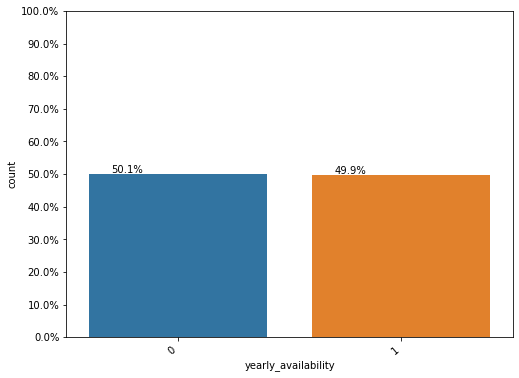

In [6]:
plt.figure(figsize=(8,6))
Y = data["yearly_availability"]
total = len(Y)*1.
ax=sns.countplot(x="yearly_availability", data=data)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

As we can see here, the classes are clearly balanced. This means we don't need to incorporate class balancing mechanisms while running our ML models on the data.

## VISUALIZING THE FEATURES

Let us now visualize all our features one by one and try and make conjectures about how relevant each feature is towards making final predictions. We will use histograms for categorical features and boxplots for numeric features.

In [7]:
def histogramPlot(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="yearly_availability")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()

## REGION

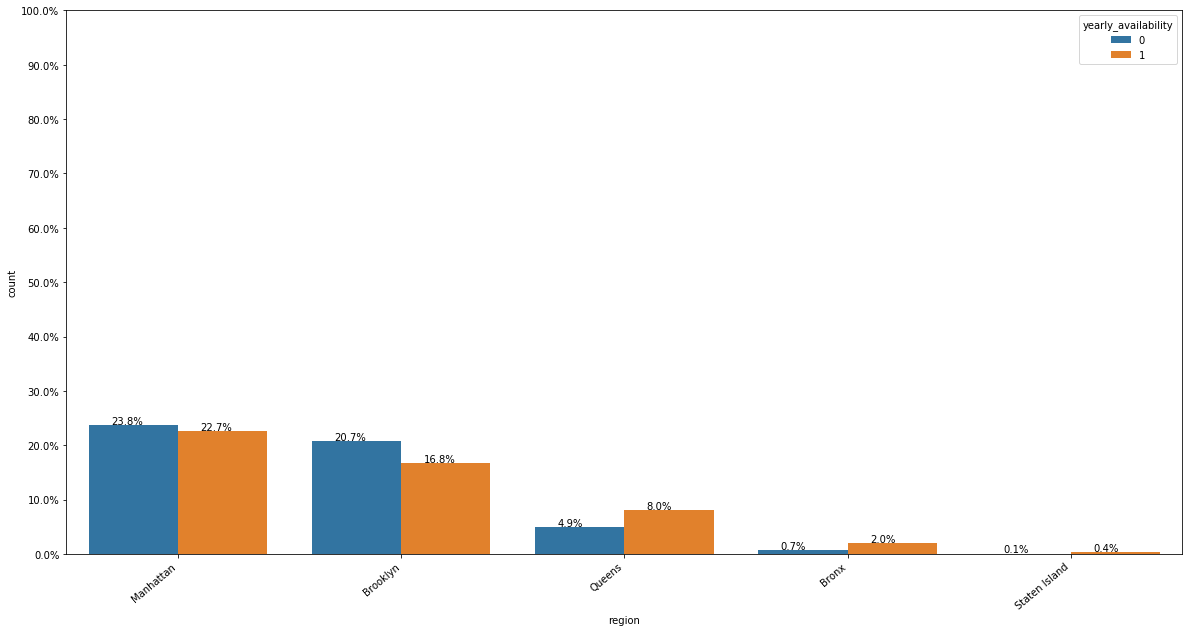

In [8]:
histogramPlot("region", data)

As we can see in the histogram above, looks like most of our hotels are in the Manhattan area, with Brooklyn being the second popular hotel destination. 

If a hotel is in Manhattan, it's hard to say if it will be available all year long or not, since the data distribution is pretty 50-50. The same can be said about hotels in Brooklyn. With hotels in Queens, there's a higher chance that they will be available throughout the year. And we hardly have any height to the histogram for hotels in the Bronx & Staten Island to be even making such conjectures.

## ACCOMMODATION TYPE

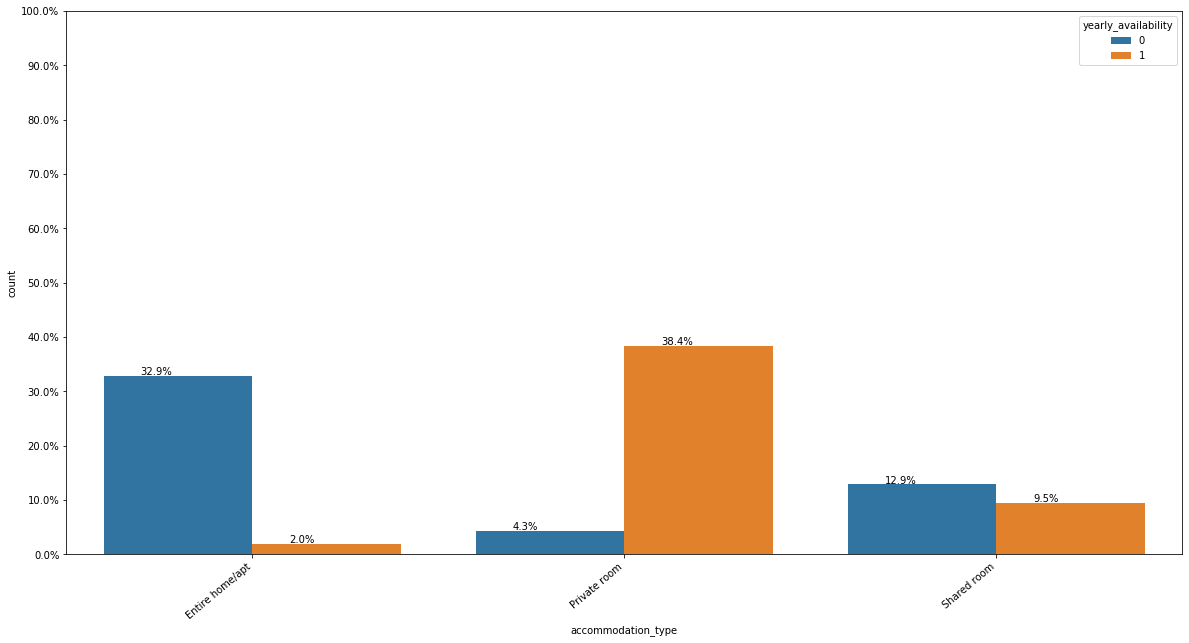

In [9]:
histogramPlot('accommodation_type', data)

Looks like Private Rooms are most common. We can make a pretty good guess about the yearly availability of a hotel with private rooms based on this histogram. They will most likely be available!

We can also be fairly confident about hotels renting out the entire home/apt. Most of these hotels won't be available throughout the year.

Nothing can be said confidently about shared rooms, since the ddifference between the heights of the two histograms isn't too significant for us to make any final decisions.

## LATITUDE

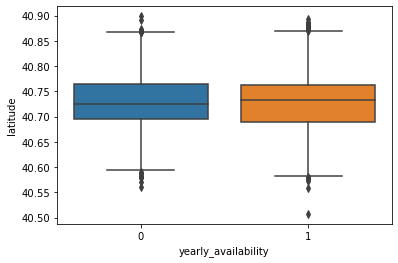

In [10]:
sns.boxplot(data = data, x = "yearly_availability", y = "latitude")
plt.show()

We see a very similar distribution between the two boxplots here which maybe indicates the latitude isn't going to be a veyr crucial feature? Again, this is something we will see later when we use Recursive Feature Elimination with Cross Validation to select features.

The first & third quartiles (Q1 & Q3) seem to be almost perfectly coinciding. This tells us we cant predict the yearly availability of a hotel from this feature alone. Lets continue with our univariate analysis.

## LONGITUDE

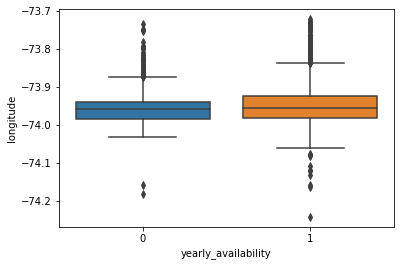

In [11]:
sns.boxplot(data = data, x = "yearly_availability", y = "longitude")
plt.show()

Here, again the boxplots are similar. Although the boxplot of yearly_availability = 1 does have a higher Q3. So, a hotel with a higher longitude value could be more likely to be available all year long.

But, since we're working on very thin margins here, it's again too early too make a call.

## COST

In [12]:
print(data["cost"].value_counts())

100     137
150     132
200     108
75       68
50       65
       ... 
5000      1
860       1
850       1
840       1
10        1
Name: cost, Length: 330, dtype: int64


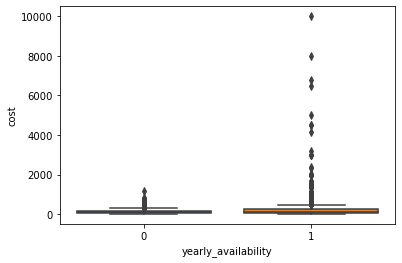

In [13]:
sns.boxplot(data = data, x = "yearly_availability", y = "cost")
plt.show()

While it does seem pretty intuitive that the cost would be a driving factor in deciding the predictor variable, the boxplot doesn't tell us an awful lot here. The IQR (interquartile range) for hotels with yearly_availability = 1 seems to be higher, which could mean higher cost could indicate year long availability. 

## MINIMUM NIGHTS

In [14]:
print(data["minimum_nights"].value_counts())

1      721
2      657
3      439
30     391
4      180
5      132
7      110
6       36
29      21
10      19
14      17
90      16
31      14
180     13
28      10
15      10
60       9
8        8
365      6
20       6
25       5
12       4
360      4
9        4
21       4
35       3
50       2
300      2
45       2
120      2
32       1
225      1
99       1
53       1
27       1
16       1
23       1
26       1
19       1
480      1
40       1
370      1
56       1
13       1
80       1
11       1
150      1
186      1
200      1
210      1
500      1
366      1
999      1
Name: minimum_nights, dtype: int64


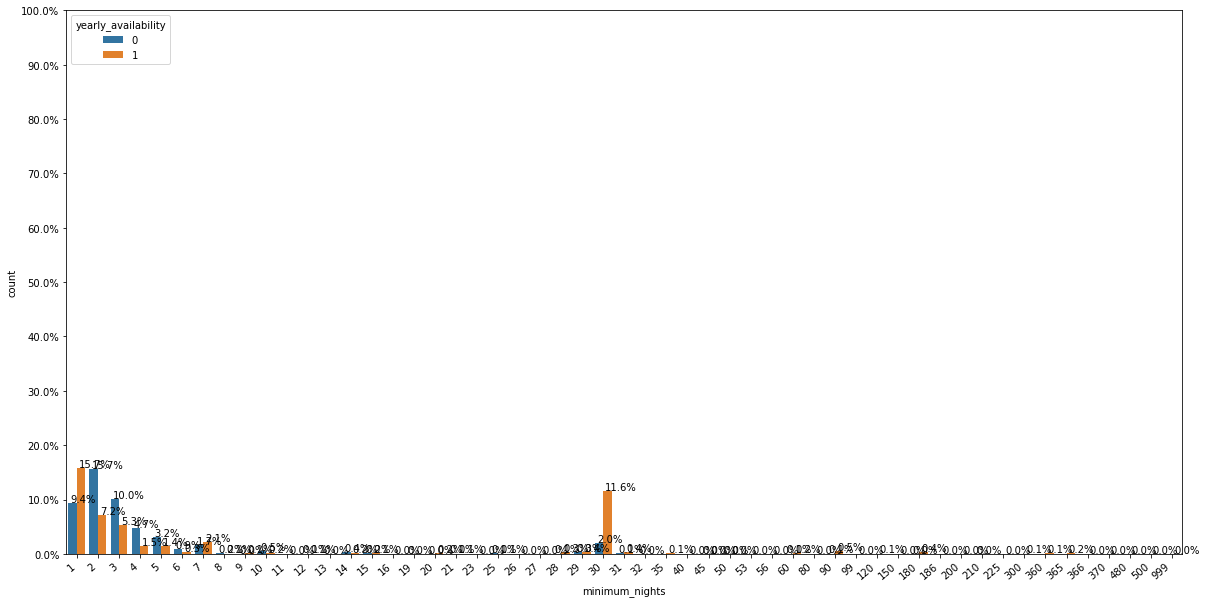

In [15]:
histogramPlot("minimum_nights", data)

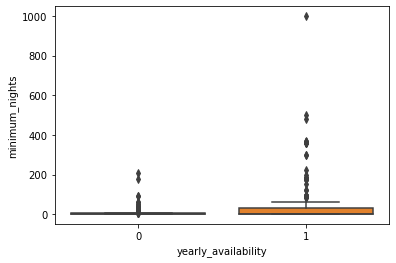

In [16]:
sns.boxplot(data = data, x = "yearly_availability", y = "minimum_nights")
plt.show()

I've plotted a histogram as well as a boxplot to better understand the distribution of the values of this feature.

We can say, in general, that hotels offering a higher value of minimum nights of stay are available all 365 days. And, in general, hotels offering a lower value of minumum nights of stay are more inclined to not be available all 365 days. This feature could potentially play a key role in determining yearly_availability

## NUMBER OF REVIEWS

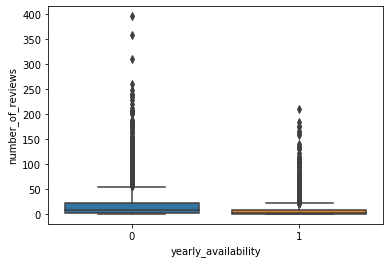

In [17]:
sns.boxplot(data = data, x = "yearly_availability", y = "number_of_reviews")
plt.show()

Hotels with more reviews tend to not be available all 365 days. But again, let's not jump to any conclusions yet.

## REVIEWS PER MONTH

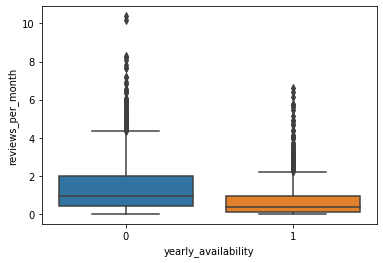

In [18]:
sns.boxplot(data = data, x = "yearly_availability", y = "reviews_per_month")
plt.show()

This feature could prove to be pretty useful.

Hotels with a higher value of this feature seem to gravitate more towards yearly_availability = 0 than 1.

## OWNER_ID

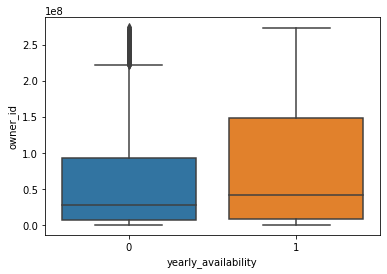

In [19]:
sns.boxplot(data = data, x = "yearly_availability", y = "owner_id")
plt.show()

While it doesn't make much sense right now, it seems that owners with higher Owner IDs generally have their hotels available all year long. 

Since, there is quite a distinction between these two histograms, this feature could again prove to be extremely useful in determining yearly_availability.

## OWNED_HOTELS

In [20]:
print(data["owned_hotels"].value_counts())

1      1663
2       385
3       173
4        92
6        72
5        55
7        42
121      31
65       29
33       26
49       25
10       24
12       23
50       22
11       21
87       20
8        20
18       19
52       16
9        15
13       10
23       10
34        9
232       9
37        8
14        7
327       7
17        6
96        5
30        4
47        3
15        3
26        3
20        3
91        3
32        2
39        2
21        1
43        1
103       1
Name: owned_hotels, dtype: int64


Seems like most of our owners own a single hotel.

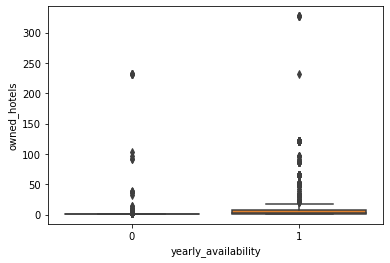

In [21]:
sns.boxplot(data = data, x = "yearly_availability", y = "owned_hotels")
plt.show()

The two boxplots are too squished for us to be making any bold assumptions here. But we see the histogram with yearly_availability has a higher IQR which could hint at the fact that maybe owners owning multiple hotels tend to have their hotels available year long.

This concludes the Data Visualization feature by feature part.

## FEATURE SELECTION USING PEARSON'S CORRELATION

In [22]:
print(data.corr())

                           id  latitude  longitude      cost  minimum_nights  \
id                   1.000000 -0.016030   0.059679 -0.036814       -0.078409   
latitude            -0.016030  1.000000   0.049337  0.009657        0.010614   
longitude            0.059679  0.049337   1.000000 -0.136140       -0.074862   
cost                -0.036814  0.009657  -0.136140  1.000000        0.052918   
minimum_nights      -0.078409  0.010614  -0.074862  0.052918        1.000000   
number_of_reviews   -0.330155  0.006295   0.006381 -0.074432       -0.088767   
reviews_per_month    0.292821  0.039400   0.059299 -0.126146       -0.133842   
owner_id             0.523565 -0.009361   0.142912 -0.049586       -0.018005   
owned_hotels         0.025907  0.064103  -0.142529  0.032185        0.107893   
yearly_availability -0.161629 -0.025119   0.119882  0.147576        0.173550   

                     number_of_reviews  reviews_per_month  owner_id  \
id                           -0.330155          

AxesSubplot(0.125,0.125;0.62x0.755)


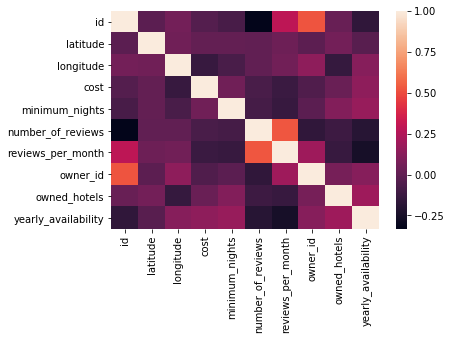

In [23]:
print(sns.heatmap(data.corr()))

When we're using Pearson's correlation to eliminate redundant features, we normally only discard one feature out a pair which has a cross-correlation of higher than 0.9. Because this indicates dependency between features.

But, as we can see here, there is not a single pair of features here with a cross-correlation higher than 0.9. We will retain all features for now.

Let's use another feature selection method later that might provide us with more insights.

## CHECKING FOR MISSING VALUES

In [24]:
count = 0
cols_nan = []
for col in data.columns.values.tolist():
    for j in list(data[col]):
        if pd.isnull(j):
            count += 1
            if cols_nan.count(col) == 0:
                cols_nan.append(col)
        
print("There are {} missing values our dataset in total.".format(count))
print("The following columns have missing values - {}.".format(cols_nan))

There are 676 missing values our dataset in total.
The following columns have missing values - ['reviews_per_month'].


So, some good news is that we have missing data in only feature viz. reviews_per_month. Let's impute this missing data.

In [25]:
print(data.columns)

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')


Let us first one hot encode the data before we can impute missing values!

## ONE HOT ENCODING THE DATA

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def add_to_dataframe(sp, data, vectorizer, name):
 
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name + "_" + col
    
    data[colname] = sp[:, i].toarray().ravel().tolist()
  
  return data

def OneHotEncoder(categorical_cols, X_train):

    for i in categorical_cols:
        
        Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
        print("Performing One-Hot Encoding for -----> ", i)

        # Encoding training dataset 
        temp_cols = Vectorizer.fit_transform(X_train[i])
        X_train = add_to_dataframe(temp_cols, X_train, Vectorizer, i)

In [27]:
OneHotEncoder(["region", "accommodation_type"], data)

Performing One-Hot Encoding for ----->  region
Performing One-Hot Encoding for ----->  accommodation_type


In [28]:
data = data.drop(["id", "region", "accommodation_type"], axis = 1)

In [30]:
cols = list(data.columns)

In [31]:
print(cols)

['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id', 'owned_hotels', 'yearly_availability', 'region_bronx', 'region_brooklyn', 'region_island', 'region_manhattan', 'region_queens', 'region_staten', 'accommodation_type_apt', 'accommodation_type_entire', 'accommodation_type_home', 'accommodation_type_private', 'accommodation_type_room', 'accommodation_type_shared']


## DATA IMPUTATION

A very common and naive strategy to imputing missing data is imputing with the mean, median and mode. For obvious reasons, these methods don't work very well in practice. Let's rather impute using a slighly sopihisticated technique called MICE (Multiple Imputations using Chained Equations).

MICE assumes the data is MAR (Missing at Random). MAR assumes distinct probability distributions between the observed & missing data unlike MCAR (Missing Completely at Random).

The more general case would be MNAR (Missing Not At Random) and is much harder to deal with.

We will use sklearn's Iterative Imputer here along with an ExtraTreesRegressor.

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [36]:
imp = IterativeImputer(random_state = 0, estimator = ExtraTreesRegressor(n_estimators = 10, random_state = 0))

In [37]:
imp.fit(data)

IterativeImputer(add_indicator=False,
                 estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                               max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=10, n_jobs=None,
                                               oob_score=False, random_state=0,
                                               verbose=0, warm_start=False),
                 imputation_order='ascending', initial_strategy='mean',
                 m

In [38]:
data_imputed = imp.transform(data)
print(data_imputed)

[[  40.71854  -74.00439  170.      ...    0.         0.         0.     ]
 [  40.64446  -73.9503    65.      ...    0.         0.         0.     ]
 [  40.78573  -73.81062   85.      ...    1.         1.         0.     ]
 ...
 [  40.76619  -73.98987  179.      ...    0.         0.         0.     ]
 [  40.74637  -73.97207  200.      ...    1.         1.         0.     ]
 [  40.79208  -73.96482 1000.      ...    0.         1.         1.     ]]


In [39]:
data = pd.DataFrame(data = data_imputed, columns = cols)

In [40]:
print(data)

      latitude  longitude    cost  minimum_nights  number_of_reviews  \
0     40.71854  -74.00439   170.0             5.0                7.0   
1     40.64446  -73.95030    65.0             3.0              238.0   
2     40.78573  -73.81062    85.0             1.0                0.0   
3     40.73863  -73.98002   210.0            30.0                0.0   
4     40.82426  -73.94630    75.0             3.0               38.0   
...        ...        ...     ...             ...                ...   
2865  40.74316  -73.98038   400.0             2.0                0.0   
2866  40.73523  -73.99465   180.0             3.0                2.0   
2867  40.76619  -73.98987   179.0             3.0               17.0   
2868  40.74637  -73.97207   200.0            30.0                0.0   
2869  40.79208  -73.96482  1000.0            30.0               24.0   

      reviews_per_month     owner_id  owned_hotels  yearly_availability  \
0                 0.560     929983.0           1.0          

Data has been successfully imputed.

Now, that our dataset is one hot encoded and missing values have been imputed, let us now try an advanced version of feature selection.

## RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION

In [69]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [70]:
y = data["yearly_availability"]
data_X = data.drop(["yearly_availability"], axis = 1)

In [71]:
print(data_X.columns)

Index(['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'owner_id', 'owned_hotels', 'region_bronx',
       'region_brooklyn', 'region_island', 'region_manhattan', 'region_queens',
       'region_staten', 'accommodation_type_apt', 'accommodation_type_entire',
       'accommodation_type_home', 'accommodation_type_private',
       'accommodation_type_room', 'accommodation_type_shared'],
      dtype='object')


In [72]:
#Use Logistic Regression as the classifier and set the fold(k) for cross validation to 10

estimator = DecisionTreeClassifier()
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=123, shuffle=True), scoring="accuracy")
rfecv.fit(data_X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
      estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Lets make a line plot of selected features against their cross validation score!

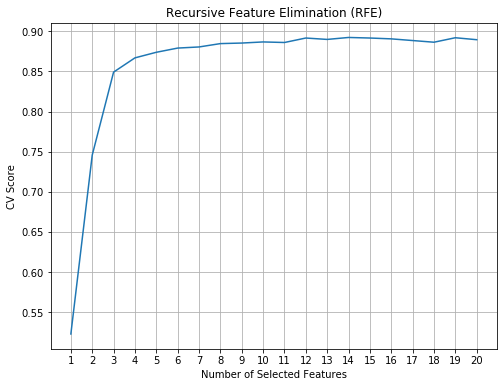

The optimal number of features: 14


In [73]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, data_X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

As we can see the optimal number of features to select out of the 20 is 14. Let's construct our new DataFrame object with only these features.

In [75]:
data_rfe = data_X.iloc[:, rfecv.support_]

In [76]:
print(data_rfe.columns)

Index(['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'owner_id', 'owned_hotels', 'region_bronx',
       'region_brooklyn', 'region_manhattan', 'region_queens',
       'accommodation_type_entire', 'accommodation_type_private'],
      dtype='object')


Feature Selection is now finally over. Let us now split our data into training and validation sets.

## SPLITTING INTO TRAINING-VALIDATION SETS

In [77]:
from sklearn.model_selection import train_test_split

#performing an 80-20 split to get training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_rfe, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(2296, 14)
(574, 14)


Now let's run some ML models!

## XGBOOST

In [106]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [107]:
from xgboost import XGBClassifier

alpha = 50

classifier = XGBClassifier(n_estimators = alpha, tree_method = "hist", use_label_encoder = False, eval_metric = "logloss")
classifier.fit(X_train, y_train)
# sig = CalibratedClassifierCV(classifier, method = "sigmoid")
# sig.fit(X_train, y_train)
predictions = classifier.predict_proba(X_test)
pred = [1 if ele[1] >= 0.5 else 0 for ele in predictions]
print("Accuracy is {}".format(accuracy_score(y_test, pred)))
    

Accuracy is 0.926829268292683


We are getting an accuracy of around 93% on the validation set which is amazing! 

Let us visualize feature importance and see which features were most instrumental in making predictions!

## FEATURE IMPORTANCE

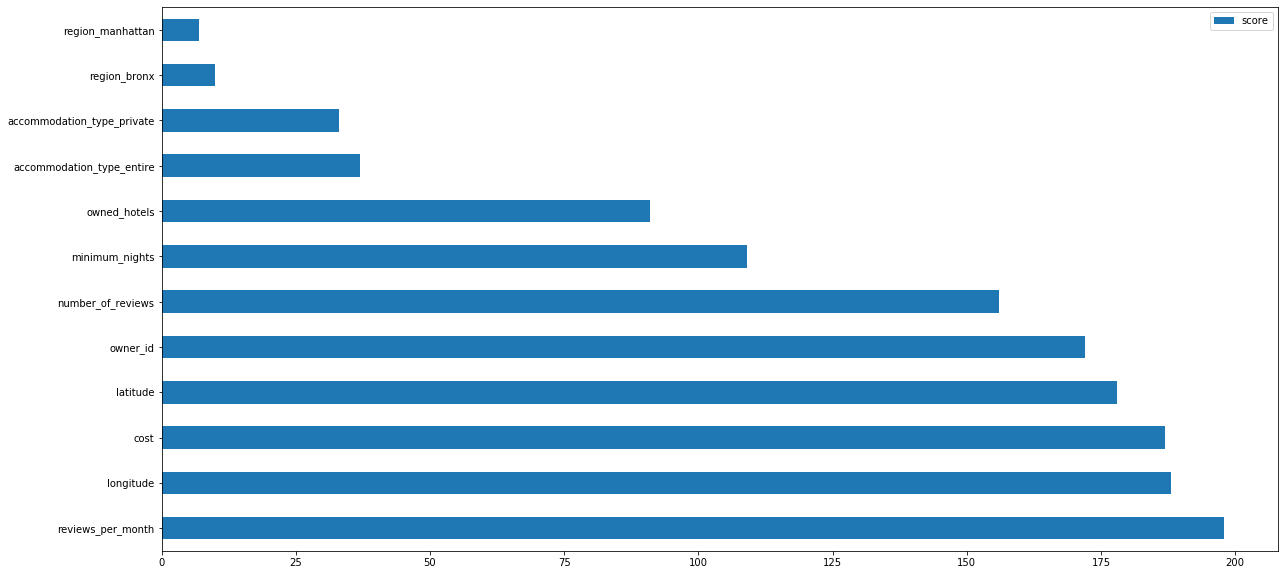

In [110]:
feature_important = classifier.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(12, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

As we can see reviews_per_month is the most influential feature. Longitude, cost and latitude follow as well.

You can take a look at this bar graph to get an idea of the most important features!

Now let's make inferences on the test set!

## PREPARING TEST DATA FOR INFERENCING

In [121]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [122]:
OneHotEncoder(["region", "accommodation_type"], test_data)

Performing One-Hot Encoding for ----->  region
Performing One-Hot Encoding for ----->  accommodation_type


In [123]:
ids = test_data["id"]
test_data = test_data.drop(["id", "region", "accommodation_type"], axis = 1)

In [124]:
imp.fit(test_data)

IterativeImputer(add_indicator=False,
                 estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                               max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=10, n_jobs=None,
                                               oob_score=False, random_state=0,
                                               verbose=0, warm_start=False),
                 imputation_order='ascending', initial_strategy='mean',
                 m

In [125]:
cols = list(test_data.columns)
test_data_imputed = imp.transform(test_data)

In [126]:
test_data = pd.DataFrame(data = test_data_imputed, columns = cols)

In [127]:
test_data_rfe = test_data.iloc[:, rfecv.support_]

In [128]:
print(test_data_rfe.columns)

Index(['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'owner_id', 'owned_hotels', 'region_bronx',
       'region_brooklyn', 'region_manhattan', 'region_queens',
       'accommodation_type_entire', 'accommodation_type_private'],
      dtype='object')


## INFERENCES

In [129]:
predictions = classifier.predict_proba(test_data_rfe)
pred = [1 if ele[1] >= 0.5 else 0 for ele in predictions]

In [134]:
ids = list(ids)

In [135]:
list_of_tuples = list(zip(ids, pred))

In [136]:
df = pd.DataFrame(list_of_tuples, columns = ["id", "yearly_availability"])

In [141]:
df.to_csv("submissions.csv", index = False, encoding='utf-8')

---